In [28]:
# pytorch 0.4.1 
# https://pytorch.org/docs/stable/index.html

# source code from https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/logistic_regression/main.py#L33-L34

from __future__ import print_function
import numpy as np
import torch
import torch.nn as nn # https://pytorch.org/docs/stable/nn.html 
import torch.utils as utils
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import matplotlib.pyplot as plt
# from torch.autograd import Variable

import copy

input_size = 28*28
num_classes = 10
# MNIST 에 라벨이 0 to 9이므로 총 10개
num_epochs = 5
batch_size = 100

# for SGD
learning_rate = 0.001

# pytorch 안에 내장되어있는 MNIST dataset를 불러온다.

train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

test_set = datasets.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())
test_loader = utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)



 - MNIST: http://yann.lecun.com/exdb/mnist/
 
 - Variable : Automatic differentiation package.
 Variable 클래스는 Tensor를 감싸고 있으며, Tensonr에 정의된 거의 모든 연산을 지원.
 모든 계산을 마친 후에 .backward()를 호출하면 자동으로 모든 기울기가 계산된다. 그러나 현재 deprecated. 일반 Tensor(torch.randn(), torch.zeros(), torch.ones()에 require_grad=True)로도 사용가능하다.
 
 
 http://taewan.kim/trans/pytorch/tutorial/blits/02_autograd/
 https://pytorch.org/docs/stable/autograd.html#variable-deprecated

 
 ```python
autograd_tensor = torch.randn((2,3,4), requires_grad=True)
 ```
 
 - torch.from_numpy(x)로 numpy로 만든 데이터를 Tensor로 컨버팅 가능하다.


In [7]:
print("train_set: ", len(train_set), " test_set: ", len(test_set))

train_set:  60000  test_set:  10000


In [12]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

 - nn.Linear :  Applies a linear transformation to the incoming data: \\[ y=xA^T+b \\] https://pytorch.org/docs/stable/nn.html?highlight=nn%20linear#torch.nn.Linear
 - torch.Tensor : https://pytorch.org/docs/stable/tensors.html
 - CrossEntropyLoss() : 
 https://pytorch.org/docs/stable/nn.html?highlight=crossentropyloss#torch.nn.CrossEntropyLoss
 combines nn.LogSoftmax() and nn.NLLLoss()(negative log likelihood loss) in one single class
 
 \\[ loss(x,class)=−log({e^x[class] \over ∑j e^x[j]}) \\]
 
 아니면 좀 더 간단하게
```python
model = nn.Linear(input_size, num_classes)
``` 
로도 구현가능.

In [27]:
model = LogisticRegression(input_size, num_classes)

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.

criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        
        images = images.reshape(-1, input_size)
        # the size -1 inferred from other dimention
        
        
        # Variable()은 deprecated므로 사용하지 않는다.
        images.requires_grad = True
        
        # Forward + Backward + Optimize

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_set)//batch_size, loss.data[0]))

# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, input_size))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

/home/agrajak/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: [1/5], Step: [100/600], Loss: 2.2381
Epoch: [1/5], Step: [200/600], Loss: 2.1738
Epoch: [1/5], Step: [300/600], Loss: 2.0742
Epoch: [1/5], Step: [400/600], Loss: 1.9650
Epoch: [1/5], Step: [500/600], Loss: 1.9123
Epoch: [1/5], Step: [600/600], Loss: 1.8137
Epoch: [2/5], Step: [100/600], Loss: 1.7538
Epoch: [2/5], Step: [200/600], Loss: 1.7071
Epoch: [2/5], Step: [300/600], Loss: 1.7373
Epoch: [2/5], Step: [400/600], Loss: 1.6277
Epoch: [2/5], Step: [500/600], Loss: 1.4991
Epoch: [2/5], Step: [600/600], Loss: 1.5331
Epoch: [3/5], Step: [100/600], Loss: 1.4048
Epoch: [3/5], Step: [200/600], Loss: 1.4031
Epoch: [3/5], Step: [300/600], Loss: 1.2109
Epoch: [3/5], Step: [400/600], Loss: 1.3022
Epoch: [3/5], Step: [500/600], Loss: 1.3035
Epoch: [3/5], Step: [600/600], Loss: 1.2172
Epoch: [4/5], Step: [100/600], Loss: 1.2289
Epoch: [4/5], Step: [200/600], Loss: 1.2211
Epoch: [4/5], Step: [300/600], Loss: 1.2091
Epoch: [4/5], Step: [400/600], Loss: 1.1389
Epoch: [4/5], Step: [500/600], L

In [58]:
# 저장
torch.save(model.state_dict(), 'model.ckpt')

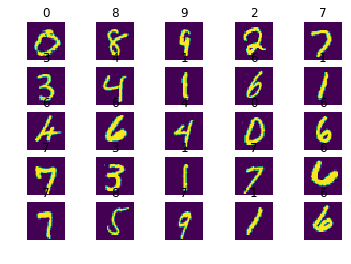

In [106]:
#matplot 연습

plot_batch_size = 25
plot_test_loader = utils.data.DataLoader(test_set, batch_size=plot_batch_size, shuffle=True, num_workers=2)


for images, labels in plot_test_loader:
    fig, axs = plt.subplots(nrows=5, ncols=5)
    
    images = images.reshape(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    images = images.reshape(-1, 28, 28)
    cnt = 0
    for ax, i in zip(axs.flat, labels):
        ax.imshow(images[cnt])
        pre = predicted[cnt].data.tolist()
        lab = labels[cnt].data.tolist()
        ax.set_title(pre)
        ax.set_axis_off()

        ax.autoscale()
        
        cnt = cnt+1
    
    plt.show()
    break
    
